Microservices: 10, Servers: 1, Time: 0.2274 seconds
Microservices: 10, Servers: 2, Time: 0.1722 seconds
Microservices: 10, Servers: 3, Time: 0.1681 seconds
Microservices: 10, Servers: 4, Time: 0.1621 seconds
Microservices: 10, Servers: 5, Time: 0.1775 seconds
Microservices: 10, Servers: 6, Time: 0.1655 seconds
Microservices: 10, Servers: 7, Time: 0.1772 seconds
Microservices: 10, Servers: 8, Time: 0.1878 seconds
Microservices: 10, Servers: 9, Time: 0.1885 seconds
Microservices: 10, Servers: 10, Time: 0.1906 seconds
Microservices: 20, Servers: 1, Time: 0.2009 seconds
Microservices: 20, Servers: 2, Time: 0.1854 seconds
Microservices: 20, Servers: 3, Time: 0.1662 seconds
Microservices: 20, Servers: 4, Time: 0.2209 seconds
Microservices: 20, Servers: 5, Time: 0.2005 seconds
Microservices: 20, Servers: 6, Time: 0.1678 seconds
Microservices: 20, Servers: 7, Time: 0.1491 seconds
Microservices: 20, Servers: 8, Time: 0.1782 seconds
Microservices: 20, Servers: 9, Time: 0.1625 seconds
Microservic

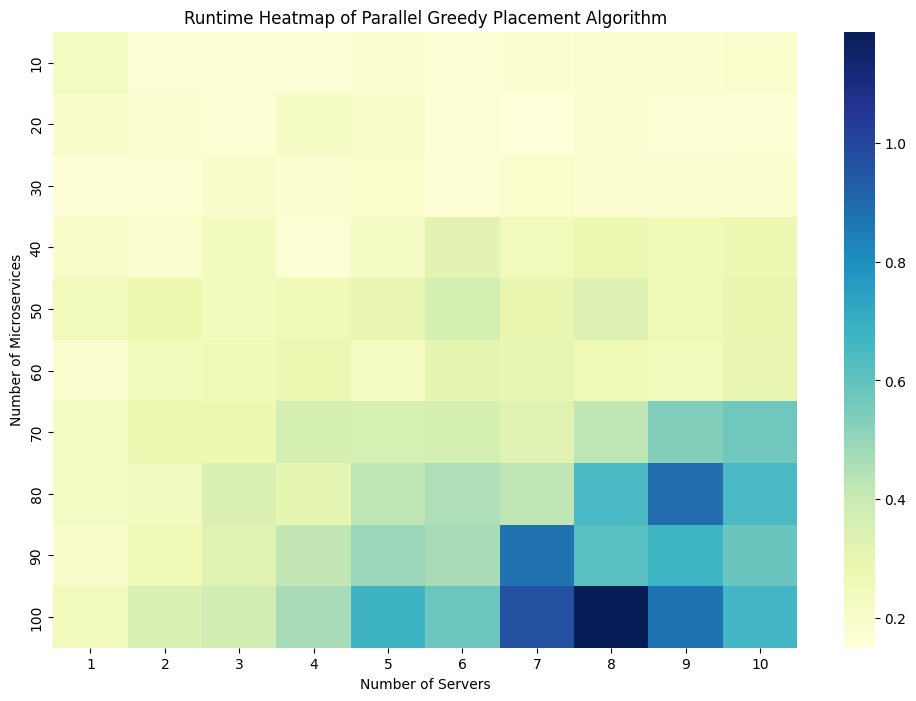

In [1]:
'''run with multi-processing'''

import numpy as np
import random
import time
import matplotlib.pyplot as plt
import seaborn as sns
from timeit import default_timer as timer
import multiprocessing as mp

def calculate_communication_cost(exec_graph, placement, delay_matrix):
    cost = 0
    for u in range(len(exec_graph)):
        for v in range(len(exec_graph[u])):
            if exec_graph[u][v] > 0:
                server_u = placement[u]
                server_v = placement[v]
                cost += exec_graph[u][v] * delay_matrix[server_u][server_v] # the cost is calculated by traffic*delay
    return cost

def greedy_placement_worker(exec_graph, delay_matrix, placement, num_servers, start, end):
    current_cost = calculate_communication_cost(exec_graph, placement, delay_matrix)
    improved = True
    while improved:
        improved = False
        for u in range(start, end):
            current_server = placement[u]
            for new_server in range(num_servers):
                if new_server != current_server:
                    new_placement = placement.copy()
                    new_placement[u] = new_server
                    new_cost = calculate_communication_cost(exec_graph, new_placement, delay_matrix)
                    if new_cost < current_cost:
                        placement = new_placement
                        current_cost = new_cost
                        improved = True
                        break
    return placement, current_cost

def parallel_greedy_placement(exec_graph, delay_matrix, placement, num_servers, num_workers=4):
    pool = mp.Pool(num_workers)
    num_microservices = len(exec_graph)
    chunk_size = num_microservices // num_workers # //: divide with integral result (discard remainder)
    chunks = [(exec_graph, delay_matrix, placement, num_servers, i*chunk_size, (i+1)*chunk_size) for i in range(num_workers)]
    results = pool.starmap(greedy_placement_worker, chunks)
    pool.close()
    pool.join()

    # Combine results from different workers
    for result in results:
        placement, _ = result
    
    return placement, calculate_communication_cost(exec_graph, placement, delay_matrix)

def generate_exec_graph(M):
    return np.random.randint(0, 30, size=(M, M))

def generate_delay_matrix(N):
    return np.random.rand(N, N) * 5

def measure_runtime(microservice_range, server_range, num_workers=4):
    runtime_matrix = np.zeros((len(microservice_range), len(server_range)))
    for i, M in enumerate(microservice_range):
        for j, N in enumerate(server_range):
            exec_graph = generate_exec_graph(M)
            delay_matrix = generate_delay_matrix(N)
            placement = [random.randint(0, N - 1) for _ in range(M)]

            start_time = timer()
            placement, total_cost = parallel_greedy_placement(exec_graph, delay_matrix, placement, N, num_workers)
            end_time = timer()
            runtime_matrix[i, j] = end_time - start_time
            print(f"Microservices: {M}, Servers: {N}, Time: {end_time - start_time:.4f} seconds")
    return runtime_matrix

microservice_range = range(10, 101, 10)
server_range = range(1, 11, 1)

runtime_matrix = measure_runtime(microservice_range, server_range, num_workers=mp.cpu_count())

plt.figure(figsize=(12, 8))
sns.heatmap(runtime_matrix, xticklabels=server_range, yticklabels=microservice_range, cmap="YlGnBu")
plt.xlabel("Number of Servers")
plt.ylabel("Number of Microservices")
plt.title("Runtime Heatmap of Parallel Greedy Placement Algorithm")
plt.show()


Microservices: 10, Servers: 1, Time: 0.0001 seconds
Microservices: 10, Servers: 2, Time: 0.0020 seconds
Microservices: 10, Servers: 3, Time: 0.0034 seconds
Microservices: 10, Servers: 4, Time: 0.0049 seconds
Microservices: 10, Servers: 5, Time: 0.0098 seconds
Microservices: 10, Servers: 6, Time: 0.0232 seconds
Microservices: 10, Servers: 7, Time: 0.0188 seconds
Microservices: 10, Servers: 8, Time: 0.0276 seconds
Microservices: 10, Servers: 9, Time: 0.0239 seconds
Microservices: 10, Servers: 10, Time: 0.0166 seconds
Microservices: 20, Servers: 1, Time: 0.0004 seconds
Microservices: 20, Servers: 2, Time: 0.0149 seconds
Microservices: 20, Servers: 3, Time: 0.0246 seconds
Microservices: 20, Servers: 4, Time: 0.0330 seconds
Microservices: 20, Servers: 5, Time: 0.1542 seconds
Microservices: 20, Servers: 6, Time: 0.1100 seconds
Microservices: 20, Servers: 7, Time: 0.1816 seconds
Microservices: 20, Servers: 8, Time: 0.1105 seconds
Microservices: 20, Servers: 9, Time: 0.1027 seconds
Microservic

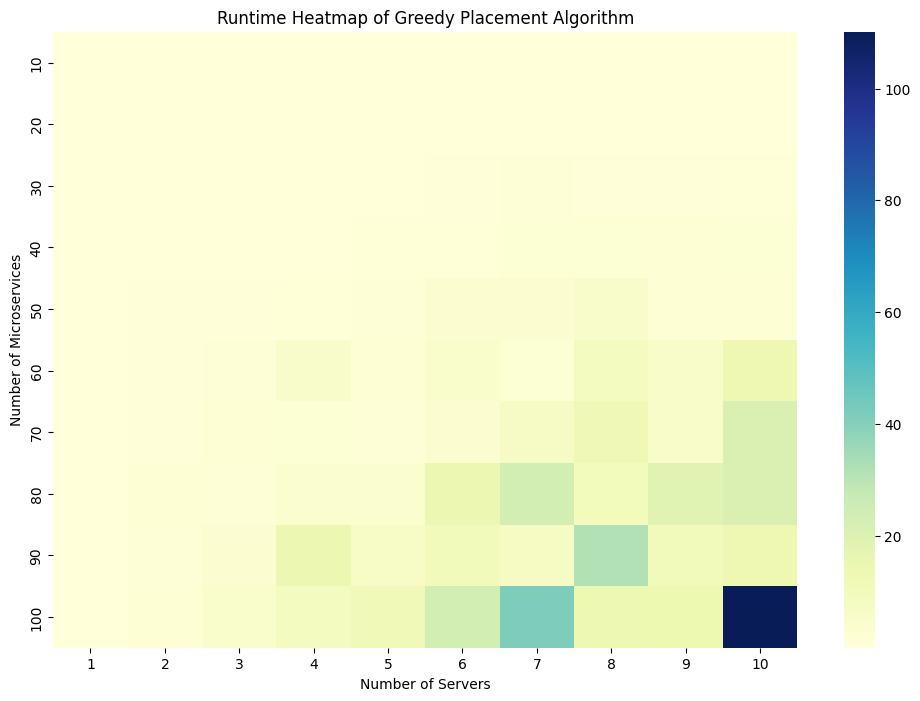

In [6]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import seaborn as sns
from timeit import default_timer as timer

def calculate_communication_cost(exec_graph, placement, delay_matrix):
    cost = 0
    for u in range(len(exec_graph)):
        for v in range(len(exec_graph[u])):
            if exec_graph[u][v] > 0:
                server_u = placement[u]
                server_v = placement[v]
                cost += exec_graph[u][v] * delay_matrix[server_u][server_v]
    return cost

def greedy_placement(exec_graph, delay_matrix, placement, num_servers):
    current_cost = calculate_communication_cost(exec_graph, placement, delay_matrix)
    improved = True
    while improved:
        improved = False
        for u in range(len(exec_graph)):
            current_server = placement[u]
            for new_server in range(num_servers):
                if new_server != current_server:
                    new_placement = placement.copy()
                    new_placement[u] = new_server
                    new_cost = calculate_communication_cost(exec_graph, new_placement, delay_matrix)
                    if new_cost < current_cost:
                        placement = new_placement
                        current_cost = new_cost
                        improved = True
                        break
    return placement, current_cost

def generate_exec_graph(M):
    # Generate random traffic volumes
    return np.random.randint(0, 30, size=(M, M))

def generate_delay_matrix(N):
    # Generate random delays between 0 and 5
    return np.random.rand(N, N) * 5

def measure_runtime(microservice_range, server_range):
    runtime_matrix = np.zeros((len(microservice_range), len(server_range)))
    for i, M in enumerate(microservice_range):
        for j, N in enumerate(server_range):
            exec_graph = generate_exec_graph(M)
            delay_matrix = generate_delay_matrix(N)
            placement = [random.randint(0, N - 1) for _ in range(M)]

            start_time = timer()
            placement, total_cost = greedy_placement(exec_graph, delay_matrix, placement, N)
            end_time = timer()
            runtime_matrix[i, j] = end_time - start_time
            print(f"Microservices: {M}, Servers: {N}, Time: {end_time - start_time:.4f} seconds")
    return runtime_matrix

microservice_range = range(10, 101, 10)
server_range = range(1, 11, 1)

runtime_matrix = measure_runtime(microservice_range, server_range)

plt.figure(figsize=(12, 8))
sns.heatmap(runtime_matrix, xticklabels=server_range, yticklabels=microservice_range, cmap="YlGnBu")
plt.xlabel("Number of Servers")
plt.ylabel("Number of Microservices")
plt.title("Runtime Heatmap of Greedy Placement Algorithm")
plt.show()


Microservices: 10, Servers: 1
Initial Placement: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Final Placement: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Initial Cost: 3326.1764100526148, Final Cost: 3326.1764100526148
Time: 0.2273 seconds

Microservices: 10, Servers: 2
Initial Placement: [1, 1, 0, 0, 0, 0, 0, 0, 1, 1]
Final Placement: [1, 1, 0, 0, 0, 0, 0, 0, 1, 1]
Initial Cost: 4175.97613978707, Final Cost: 4175.97613978707
Time: 0.1624 seconds

Microservices: 10, Servers: 3
Initial Placement: [1, 2, 2, 0, 1, 1, 2, 2, 2, 1]
Final Placement: [1, 2, 2, 0, 1, 1, 2, 2, 2, 1]
Initial Cost: 3941.7209954651867, Final Cost: 3941.7209954651867
Time: 0.1741 seconds

Microservices: 10, Servers: 4
Initial Placement: [0, 2, 0, 2, 1, 0, 2, 3, 2, 0]
Final Placement: [0, 2, 0, 2, 1, 0, 2, 3, 2, 0]
Initial Cost: 3311.0967197282857, Final Cost: 3311.0967197282857
Time: 0.1566 seconds

Microservices: 10, Servers: 5
Initial Placement: [1, 0, 1, 1, 2, 1, 2, 4, 1, 4]
Final Placement: [1, 0, 1, 1, 2, 1, 2, 4, 1, 4]
Initial Cost: 26

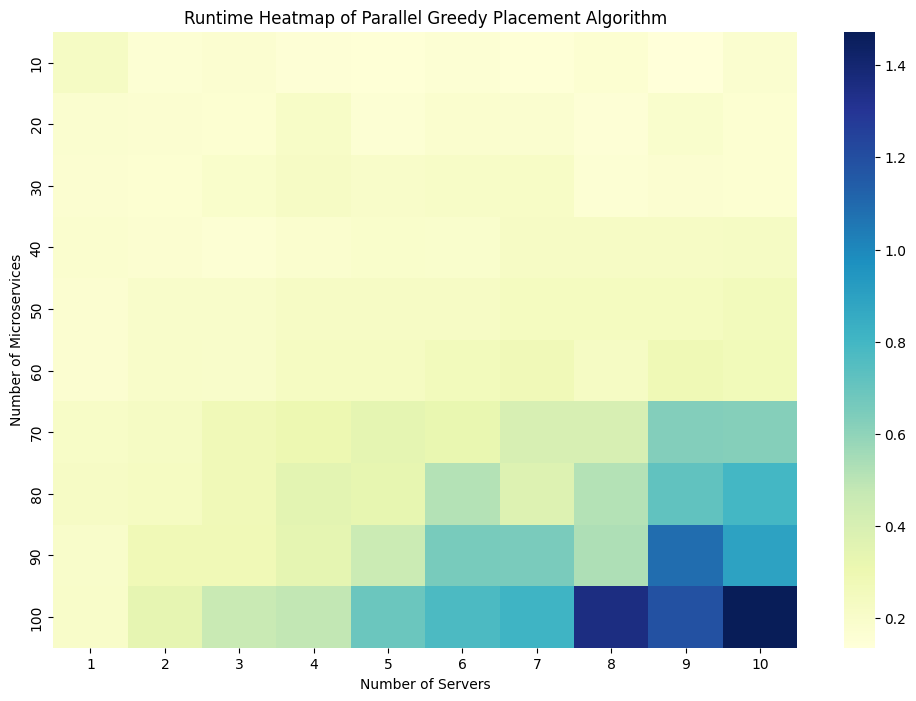

In [1]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import seaborn as sns
from timeit import default_timer as timer
import multiprocessing as mp

def calculate_communication_cost(exec_graph, placement, delay_matrix):
    cost = 0
    for u in range(len(exec_graph)):
        for v in range(len(exec_graph[u])):
            if exec_graph[u][v] > 0:
                server_u = placement[u]
                server_v = placement[v]
                cost += exec_graph[u][v] * delay_matrix[server_u][server_v] # the cost is calculated by traffic*delay
    return cost

def greedy_placement_worker(exec_graph, delay_matrix, placement, num_servers, start, end):
    current_cost = calculate_communication_cost(exec_graph, placement, delay_matrix)
    improved = True
    while improved:
        improved = False
        for u in range(start, end):
            current_server = placement[u]
            for new_server in range(num_servers):
                if new_server != current_server:
                    new_placement = placement.copy()
                    new_placement[u] = new_server
                    new_cost = calculate_communication_cost(exec_graph, new_placement, delay_matrix)
                    if new_cost < current_cost:
                        placement = new_placement
                        current_cost = new_cost
                        improved = True
                        break
    return placement, current_cost

def parallel_greedy_placement(exec_graph, delay_matrix, placement, num_servers, num_workers=4):
    pool = mp.Pool(num_workers)
    num_microservices = len(exec_graph)
    chunk_size = num_microservices // num_workers # //: divide with integral result (discard remainder)
    chunks = [(exec_graph, delay_matrix, placement, num_servers, i*chunk_size, (i+1)*chunk_size) for i in range(num_workers)]
    results = pool.starmap(greedy_placement_worker, chunks)
    pool.close()
    pool.join()

    # Combine results from different workers
    for result in results:
        placement, _ = result
    
    return placement, calculate_communication_cost(exec_graph, placement, delay_matrix)

def generate_exec_graph(M):
    return np.random.randint(0, 30, size=(M, M))

def generate_delay_matrix(N):
    return np.random.rand(N, N) * 5

def measure_runtime(microservice_range, server_range, num_workers=4):
    runtime_matrix = np.zeros((len(microservice_range), len(server_range)))
    for i, M in enumerate(microservice_range):
        for j, N in enumerate(server_range):
            exec_graph = generate_exec_graph(M)
            delay_matrix = generate_delay_matrix(N)
            initial_placement = [random.randint(0, N - 1) for _ in range(M)]

            start_time = timer()
            final_placement, final_cost = parallel_greedy_placement(exec_graph, delay_matrix, initial_placement.copy(), N, num_workers)
            end_time = timer()
            runtime_matrix[i, j] = end_time - start_time

            initial_cost = calculate_communication_cost(exec_graph, initial_placement, delay_matrix)
            
            print(f"Microservices: {M}, Servers: {N}")
            print(f"Initial Placement: {initial_placement}")
            print(f"Final Placement: {final_placement}")
            print(f"Initial Cost: {initial_cost}, Final Cost: {final_cost}")
            print(f"Time: {end_time - start_time:.4f} seconds\n")

    return runtime_matrix

microservice_range = range(10, 101, 10)
server_range = range(1, 11, 1)

runtime_matrix = measure_runtime(microservice_range, server_range, num_workers=mp.cpu_count())

plt.figure(figsize=(12, 8))
sns.heatmap(runtime_matrix, xticklabels=server_range, yticklabels=microservice_range, cmap="YlGnBu")
plt.xlabel("Number of Servers")
plt.ylabel("Number of Microservices")
# plt.title("Runtime Heatmap of Parallel Greedy Placement Algorithm")
plt.show()


In [6]:
'''second plot version'''


import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from timeit import default_timer as timer
import multiprocessing as mp

def calculate_communication_cost(exec_graph, placement, delay_matrix):
    cost = 0
    for u in range(len(exec_graph)):
        for v in range(len(exec_graph[u])):
            if exec_graph[u][v] > 0:
                server_u = placement[u]
                server_v = placement[v]
                cost += exec_graph[u][v] * delay_matrix[server_u][server_v] # the cost is calculated by traffic*delay
    return cost

def greedy_placement_worker(exec_graph, delay_matrix, placement, num_servers, start, end):
    current_cost = calculate_communication_cost(exec_graph, placement, delay_matrix)
    improved = True
    while improved:
        improved = False
        for u in range(start, end):
            current_server = placement[u]
            for new_server in range(num_servers):
                if new_server != current_server:
                    new_placement = placement.copy()
                    new_placement[u] = new_server
                    new_cost = calculate_communication_cost(exec_graph, new_placement, delay_matrix)
                    if new_cost < current_cost:
                        placement = new_placement
                        current_cost = new_cost
                        improved = True
                        break
    return placement, current_cost

def parallel_greedy_placement(exec_graph, delay_matrix, placement, num_servers, num_workers=4):
    pool = mp.Pool(num_workers)
    num_microservices = len(exec_graph)
    chunk_size = num_microservices // num_workers # //: divide with integral result (discard remainder)
    chunks = [(exec_graph, delay_matrix, placement, num_servers, i*chunk_size, (i+1)*chunk_size) for i in range(num_workers)]
    results = pool.starmap(greedy_placement_worker, chunks)
    pool.close()
    pool.join()

    # Combine results from different workers
    for result in results:
        placement, _ = result
    
    return placement, calculate_communication_cost(exec_graph, placement, delay_matrix)

def generate_exec_graph(M):
    return np.random.randint(0, 30, size=(M, M))

def generate_delay_matrix(N):
    return np.random.rand(N, N) * 5

def measure_runtime(microservice_range, server_range, num_workers=4):
    runtime_matrix = np.zeros((len(microservice_range), len(server_range)))
    all_runtimes = []
    for i, M in enumerate(microservice_range):
        for j, N in enumerate(server_range):
            exec_graph = generate_exec_graph(M)
            delay_matrix = generate_delay_matrix(N)
            initial_placement = [random.randint(0, N - 1) for _ in range(M)]

            start_time = timer()
            final_placement, final_cost = parallel_greedy_placement(exec_graph, delay_matrix, initial_placement.copy(), N, num_workers)
            end_time = timer()
            runtime = end_time - start_time
            runtime_matrix[i, j] = runtime
            all_runtimes.append(runtime)

            initial_cost = calculate_communication_cost(exec_graph, initial_placement, delay_matrix)
            
            print(f"Microservices: {M}, Servers: {N}")
            print(f"Initial Placement: {initial_placement}")
            print(f"Final Placement: {final_placement}")
            print(f"Initial Cost: {initial_cost}, Final Cost: {final_cost}")
            print(f"Time: {runtime:.4f} seconds\n")

    print(f"Minimum runtime: {min(all_runtimes):.4f} seconds")
    print(f"Maximum runtime: {max(all_runtimes):.4f} seconds")
    print(f"Average runtime: {np.mean(all_runtimes):.4f} seconds")
    
    return runtime_matrix, all_runtimes

microservice_range = range(10, 101, 10)
server_range = range(1, 11, 1)

runtime_matrix, all_runtimes = measure_runtime(microservice_range, server_range, num_workers=mp.cpu_count())




Microservices: 10, Servers: 1
Initial Placement: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Final Placement: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Initial Cost: 992.8197132396074, Final Cost: 992.8197132396074
Time: 0.2096 seconds

Microservices: 10, Servers: 2
Initial Placement: [1, 1, 1, 0, 0, 1, 1, 1, 0, 1]
Final Placement: [1, 1, 1, 0, 0, 1, 1, 1, 0, 1]
Initial Cost: 3617.2667118970057, Final Cost: 3617.2667118970057
Time: 0.1938 seconds

Microservices: 10, Servers: 3
Initial Placement: [0, 0, 1, 1, 1, 2, 1, 1, 1, 1]
Final Placement: [0, 0, 1, 1, 1, 2, 1, 1, 1, 1]
Initial Cost: 3763.655646595101, Final Cost: 3763.655646595101
Time: 0.2241 seconds

Microservices: 10, Servers: 4
Initial Placement: [0, 2, 0, 0, 1, 2, 3, 1, 3, 3]
Final Placement: [0, 2, 0, 0, 1, 2, 3, 1, 3, 3]
Initial Cost: 4493.327724425977, Final Cost: 4493.327724425977
Time: 0.1687 seconds

Microservices: 10, Servers: 5
Initial Placement: [4, 2, 1, 4, 1, 1, 0, 1, 3, 0]
Final Placement: [4, 2, 1, 4, 1, 1, 0, 1, 3, 0]
Initial Cost: 3325

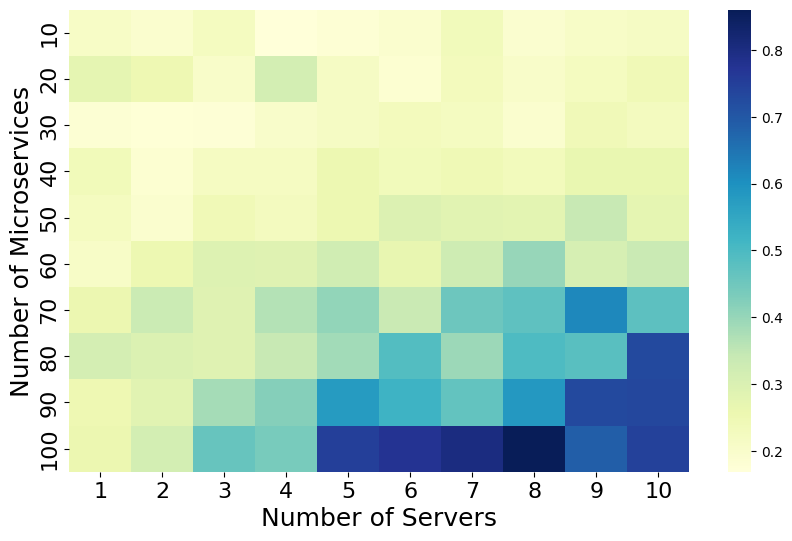

In [8]:
# Plot 1: Runtime Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(runtime_matrix, xticklabels=server_range, yticklabels=microservice_range, cmap="YlGnBu")
plt.xlabel("Number of Servers", fontsize=18)
plt.ylabel("Number of Microservices", fontsize=18)
# plt.title("Runtime Heatmap of Parallel Greedy Placement Algorithm")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()



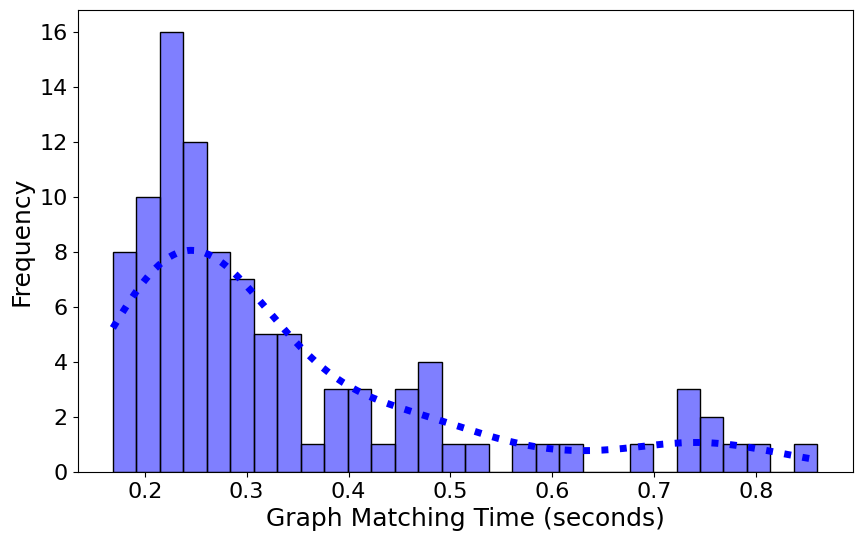

In [24]:
# Plot 2: Distribution of Runtimes
plt.figure(figsize=(10, 6))
sns.histplot(all_runtimes, bins=30, kde=True, color="blue", line_kws={'color': 'crimson', 'lw': 5, 'ls': ':'})



plt.xlabel("Graph Matching Time (seconds)", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
# plt.title("Distribution of All Runtimes")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

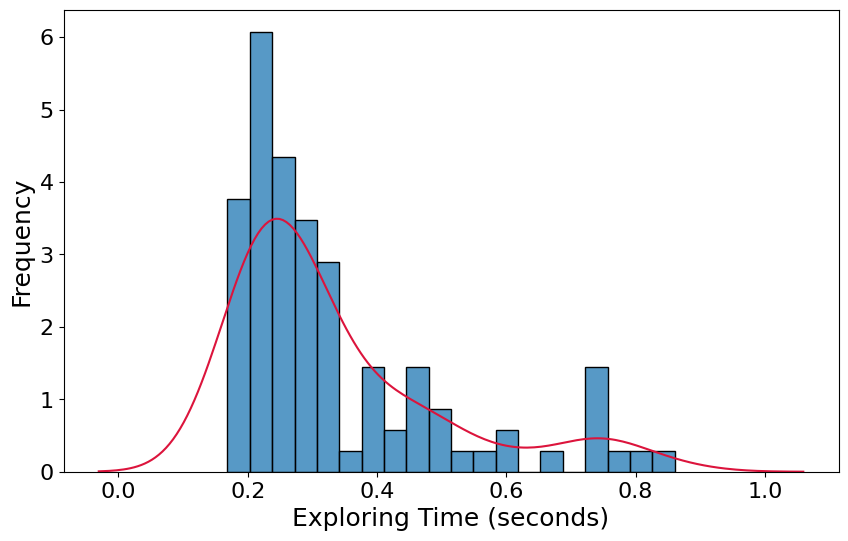

In [19]:
# Plot 2: Distribution of Runtimes
plt.figure(figsize=(10, 6))
# sns.histplot(all_runtimes, bins=20, kde=True, color="red", line_kws={'color': 'crimson', 'lw': 5, 'ls': ':'})

ax = sns.histplot(data=all_runtimes, bins=20, kde=False, stat='density')
sns.kdeplot(data=all_runtimes, color='crimson', ax=ax)


plt.xlabel("Exploring Time (seconds)", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
# plt.title("Distribution of All Runtimes")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()